In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Please note we have processed the data in excel to get the years of experience and even processed data related to rating ang separated place from city
Deleted the records with missing data

In [139]:
df = pd.read_excel("C:/Users/drash/OneDrive/Desktop/PythonSQL/Doctor Final_Train4.xlsx")

df1 = pd.read_excel("C:/Users/drash/OneDrive/Desktop/PythonSQL/Doctor Final_Train4.xlsx")

df

,Qualification,Q1,Q2,Q3,Q4,Q5,Experience,ExperienceYears,Rating,Place,City,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",BHMS,MD - Homeopathy,NaN,NaN,NaN,24 years experience,24,1.00,Kakkanad,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",BAMS,MD - Ayurveda Medicine,NaN,NaN,NaN,12 years experience,12,0.98,Whitefield,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,9 years experience,9,0.00,Mathikere - BEL,Bangalore,ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",BSc - Zoology,BAMS,NaN,NaN,NaN,12 years experience,12,0.00,Bannerghatta Road,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,BAMS,NaN,NaN,NaN,NaN,20 years experience,20,1.00,Keelkattalai,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,"MBBS, MS - ENT",MBBS,MS - ENT,NaN,NaN,NaN,19 years experience,19,0.98,Basavanagudi,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5867,MBBS,MBBS,NaN,NaN,NaN,NaN,33 years experience,33,0.00,Nungambakkam,Chennai,General Medicine,NaN,100
5868,MBBS,MBBS,NaN,NaN,NaN,NaN,41 years experience,41,0.97,Greater Kailash Part 2,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5869,"MBBS, MD - General Medicine",MBBS,MD - General Medicine,NaN,NaN,NaN,15 years experience,15,0.90,Vileparle West,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [140]:
# Please note the test data has only attributes and not target variable i.e. fees

test = pd.read_excel("C:/Users/drash/OneDrive/Desktop/PythonSQL/Doctor Final_Test4.xlsx")

test

,Qualification,Q1,Q2,Q3,Q4,Q5,Experience,ExperienceYears,Rating,Place,City,Profile,Miscellaneous_Info
0,MBBS,MBBS,NaN,NaN,NaN,NaN,35 years experience,35,0.00,Ghatkopar East,Mumbai,General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",MBBS,Diploma in Otorhinolaryngology (DLO),NaN,NaN,NaN,31 years experience,31,0.00,West Marredpally,Hyderabad,ENT Specialist,NaN
2,"MBBS, DDVL",MBBS,DDVL,NaN,NaN,NaN,40 years experience,40,0.70,KK Nagar,Chennai,Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,"BDS, MDS - Conservative Dentistry & Endodontics",BDS,MDS - Conservative Dentistry & Endodontics,NaN,NaN,NaN,16 years experience,16,1.00,Kanakpura Road,Bangalore,Dentist,General Dentistry Conservative Dentistry Cosme...
4,"BDS, MDS",BDS,MDS,NaN,NaN,NaN,14 years experience,14,0.90,Velachery,Chennai,Dentist,Acrylic Partial Denture Impaction / Impacted T...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,"BAMS, Doctor of Medicine",BAMS,Doctor of Medicine,NaN,NaN,NaN,10 years experience,10,0.00,Basavanagudi,Bangalore,Ayurveda,NaN
1952,"MD - Dermatology , Venereology & Leprosy, MBBS",MD - Dermatology,Venereology & Leprosy,MBBS,NaN,NaN,4 years experience,4,0.00,Choolai,Chennai,Dermatologists,NaN
1953,"MBBS, MD / MS - Obstetrics & Gynaecology",MBBS,MD / MS - Obstetrics & Gynaecology,NaN,NaN,NaN,9 years experience,9,0.00,Porur,Chennai,General Medicine,NaN
1954,BDS,BDS,NaN,NaN,NaN,NaN,12 years experience,12,0.98,Arekere,Bangalore,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [141]:
df.shape , test.shape

((5871, 14), (1956, 13))

In [142]:
df.dtypes

Qualification          object
Q1                     object
Q2                     object
Q3                     object
Q4                     object
Q5                     object
Experience             object
ExperienceYears         int64
Rating                float64
Place                  object
City                   object
Profile                object
Miscellaneous_Info     object
Fees                    int64
dtype: object

In [143]:
# Deleting Experience since we have experienceyears and Miscellaneous since we have ratings

df = df.drop(["Experience" , "Miscellaneous_Info" ] , axis = 1)
test = test.drop(["Experience" , "Miscellaneous_Info"] , axis = 1)

In [144]:
df

,Qualification,Q1,Q2,Q3,Q4,Q5,ExperienceYears,Rating,Place,City,Profile,Fees
0,"BHMS, MD - Homeopathy",BHMS,MD - Homeopathy,NaN,NaN,NaN,24,1.00,Kakkanad,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",BAMS,MD - Ayurveda Medicine,NaN,NaN,NaN,12,0.98,Whitefield,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",MBBS,MS - Otorhinolaryngology,NaN,NaN,NaN,9,0.00,Mathikere - BEL,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",BSc - Zoology,BAMS,NaN,NaN,NaN,12,0.00,Bannerghatta Road,Bangalore,Ayurveda,250
4,BAMS,BAMS,NaN,NaN,NaN,NaN,20,1.00,Keelkattalai,Chennai,Ayurveda,250
...,...,...,...,...,...,...,...,...,...,...,...,...
5866,"MBBS, MS - ENT",MBBS,MS - ENT,NaN,NaN,NaN,19,0.98,Basavanagudi,Bangalore,ENT Specialist,300
5867,MBBS,MBBS,NaN,NaN,NaN,NaN,33,0.00,Nungambakkam,Chennai,General Medicine,100
5868,MBBS,MBBS,NaN,NaN,NaN,NaN,41,0.97,Greater Kailash Part 2,Delhi,General Medicine,600
5869,"MBBS, MD - General Medicine",MBBS,MD - General Medicine,NaN,NaN,NaN,15,0.90,Vileparle West,Mumbai,General Medicine,100


In [145]:
test

,Qualification,Q1,Q2,Q3,Q4,Q5,ExperienceYears,Rating,Place,City,Profile
0,MBBS,MBBS,NaN,NaN,NaN,NaN,35,0.00,Ghatkopar East,Mumbai,General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",MBBS,Diploma in Otorhinolaryngology (DLO),NaN,NaN,NaN,31,0.00,West Marredpally,Hyderabad,ENT Specialist
2,"MBBS, DDVL",MBBS,DDVL,NaN,NaN,NaN,40,0.70,KK Nagar,Chennai,Dermatologists
3,"BDS, MDS - Conservative Dentistry & Endodontics",BDS,MDS - Conservative Dentistry & Endodontics,NaN,NaN,NaN,16,1.00,Kanakpura Road,Bangalore,Dentist
4,"BDS, MDS",BDS,MDS,NaN,NaN,NaN,14,0.90,Velachery,Chennai,Dentist
...,...,...,...,...,...,...,...,...,...,...,...
1951,"BAMS, Doctor of Medicine",BAMS,Doctor of Medicine,NaN,NaN,NaN,10,0.00,Basavanagudi,Bangalore,Ayurveda
1952,"MD - Dermatology , Venereology & Leprosy, MBBS",MD - Dermatology,Venereology & Leprosy,MBBS,NaN,NaN,4,0.00,Choolai,Chennai,Dermatologists
1953,"MBBS, MD / MS - Obstetrics & Gynaecology",MBBS,MD / MS - Obstetrics & Gynaecology,NaN,NaN,NaN,9,0.00,Porur,Chennai,General Medicine
1954,BDS,BDS,NaN,NaN,NaN,NaN,12,0.98,Arekere,Bangalore,Dentist


In [146]:
df.describe()

,ExperienceYears,Rating,Fees
count,5871.000000,5871.000000,5871.000000
mean,17.554931,0.426760,309.613013
std,11.021584,0.473967,190.904247
min,2.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,15.000000,0.000000,300.000000
75%,23.000000,0.970000,500.000000
max,66.000000,1.000000,950.000000


# Observations:
    
1. Mean > Median(50%) => All columns = > Right Skewed
2. Outliers are present in fees and experience 

# Checking for NaN values

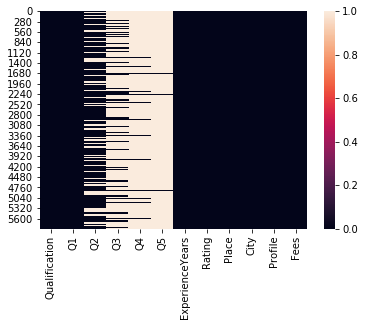

In [147]:
sns.heatmap(df.isnull())

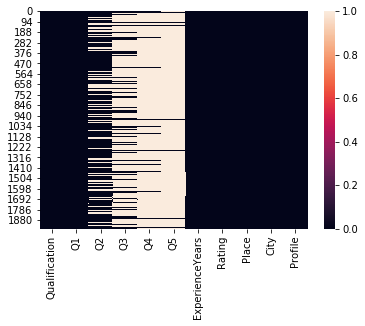

In [148]:
sns.heatmap(test.isnull())

In [150]:
# Replacing NaN values with NA as this is processed data and we have devided single column into multiple columns

list = ["Q2","Q3","Q4","Q5"]


for i in range(len(list)):
    df[list[i]] = df[list[i]].replace(np.nan,"NA")
    test[list[i]] = test[list[i]].replace(np.nan,"NA")

    

(<matplotlib.axes._subplots.AxesSubplot at 0x1e333732108>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e333732108>)

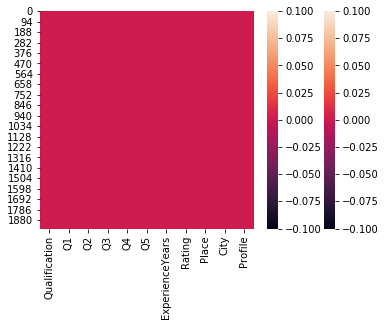

In [151]:
sns.heatmap(df.isnull()) , sns.heatmap(test.isnull())

No Nan Values present

# Label Encoder

In [152]:
df.dtypes

Qualification       object
Q1                  object
Q2                  object
Q3                  object
Q4                  object
Q5                  object
ExperienceYears      int64
Rating             float64
Place               object
City                object
Profile             object
Fees                 int64
dtype: object

In [153]:
# Dropping Qualification as we have splitted it into many columns

df = df.drop(["Qualification"] , axis = 1)
test = test.drop(["Qualification"] , axis = 1)


In [154]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'ExperienceYears', 'Rating', 'Place',
       'City', 'Profile', 'Fees'],
      dtype='object')

In [155]:
# Converting Non Numeric Columns to Numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df

list = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Place','City', 'Profile']

for i in range(len(list)):
    df[list[i]] = le.fit_transform(df[list[i]].astype(str))
    test[list[i]] = le.fit_transform(test[list[i]].astype(str))

In [156]:
df.dtypes , test.dtypes

(Q1                   int32
 Q2                   int32
 Q3                   int32
 Q4                   int32
 Q5                   int32
 ExperienceYears      int64
 Rating             float64
 Place                int32
 City                 int32
 Profile              int32
 Fees                 int64
 dtype: object,
 Q1                   int32
 Q2                   int32
 Q3                   int32
 Q4                   int32
 Q5                   int32
 ExperienceYears      int64
 Rating             float64
 Place                int32
 City                 int32
 Profile              int32
 dtype: object)

# Univariant Anlysis

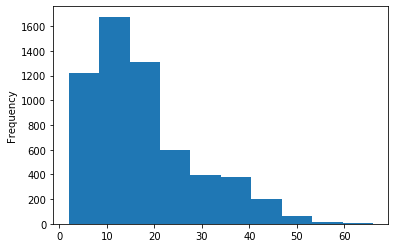

In [21]:
# Highest data is present for experience from 9-11 years

df["ExperienceYears"].plot.hist()

In [22]:
df1.ExperienceYears.value_counts()

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
61      1
58      1
66      1
65      1
Name: ExperienceYears, Length: 63, dtype: int64

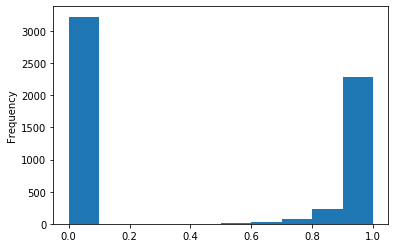

In [23]:
# Highest records where rating is present is 1.00 

df["Rating"].plot.hist()

In [24]:
df1.Rating.value_counts()

0.00    3224
1.00     682
0.98     290
0.99     259
0.97     240
0.96     218
0.95     176
0.94     115
0.93     109
0.92      66
0.90      65
0.91      60
0.89      41
0.88      40
0.85      27
0.82      23
0.86      21
0.83      21
0.80      19
0.77      16
0.87      14
0.84      13
0.67      12
0.79      12
0.81      11
0.71       9
0.76       9
0.75       8
0.73       8
0.60       7
0.74       7
0.78       6
0.68       5
0.56       5
0.70       4
0.69       4
0.57       3
0.72       3
0.55       2
0.63       2
0.64       2
0.33       2
0.62       2
0.48       1
0.53       1
0.45       1
0.36       1
0.58       1
0.07       1
0.40       1
0.65       1
0.47       1
Name: Rating, dtype: int64

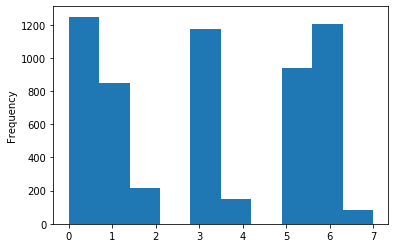

In [25]:
# Highest data is present for doctors in Banglore and Mumbai

df["City"].plot.hist()

In [26]:
df1.City.value_counts()

 Bangalore             1249
 Mumbai                1206
 Delhi                 1172
 Hyderabad              942
 Chennai                847
 Coimbatore             218
 Ernakulam              152
 Thiruvananthapuram      85
Name: City, dtype: int64

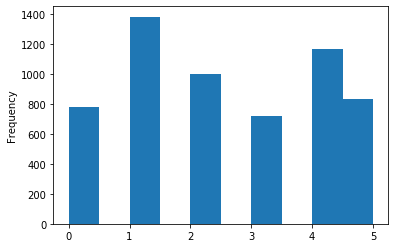

In [27]:
# Higeshest records are present for Dentist and then General MEdicine

df["Profile"].plot.hist()

In [28]:
df1.Profile.value_counts()

Dentist             1380
General Medicine    1166
Dermatologists       998
Homeopath            829
Ayurveda             779
ENT Specialist       719
Name: Profile, dtype: int64

# Bivarient Analysis

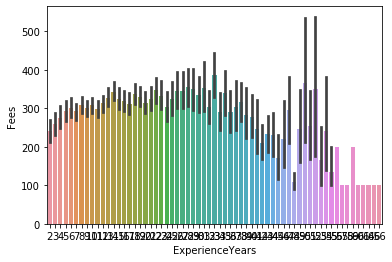

In [29]:
# As the years of experience are very high the fees relatively reduced

sns.barplot(y=df['Fees'], x=df['ExperienceYears'],data=df)
plt.show()

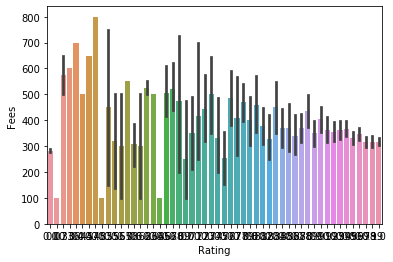

In [30]:
sns.barplot(y=df['Fees'], x=df['Rating'],data=df)
plt.show()

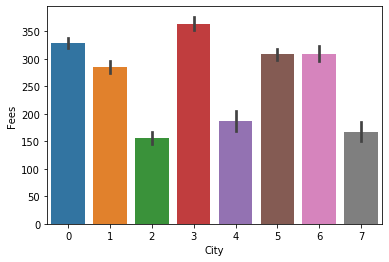

In [31]:
# High fees are in Delhi as comparaed to other cities

sns.barplot(y=df['Fees'], x=df['City'],data=df)
plt.show()

# Correlation

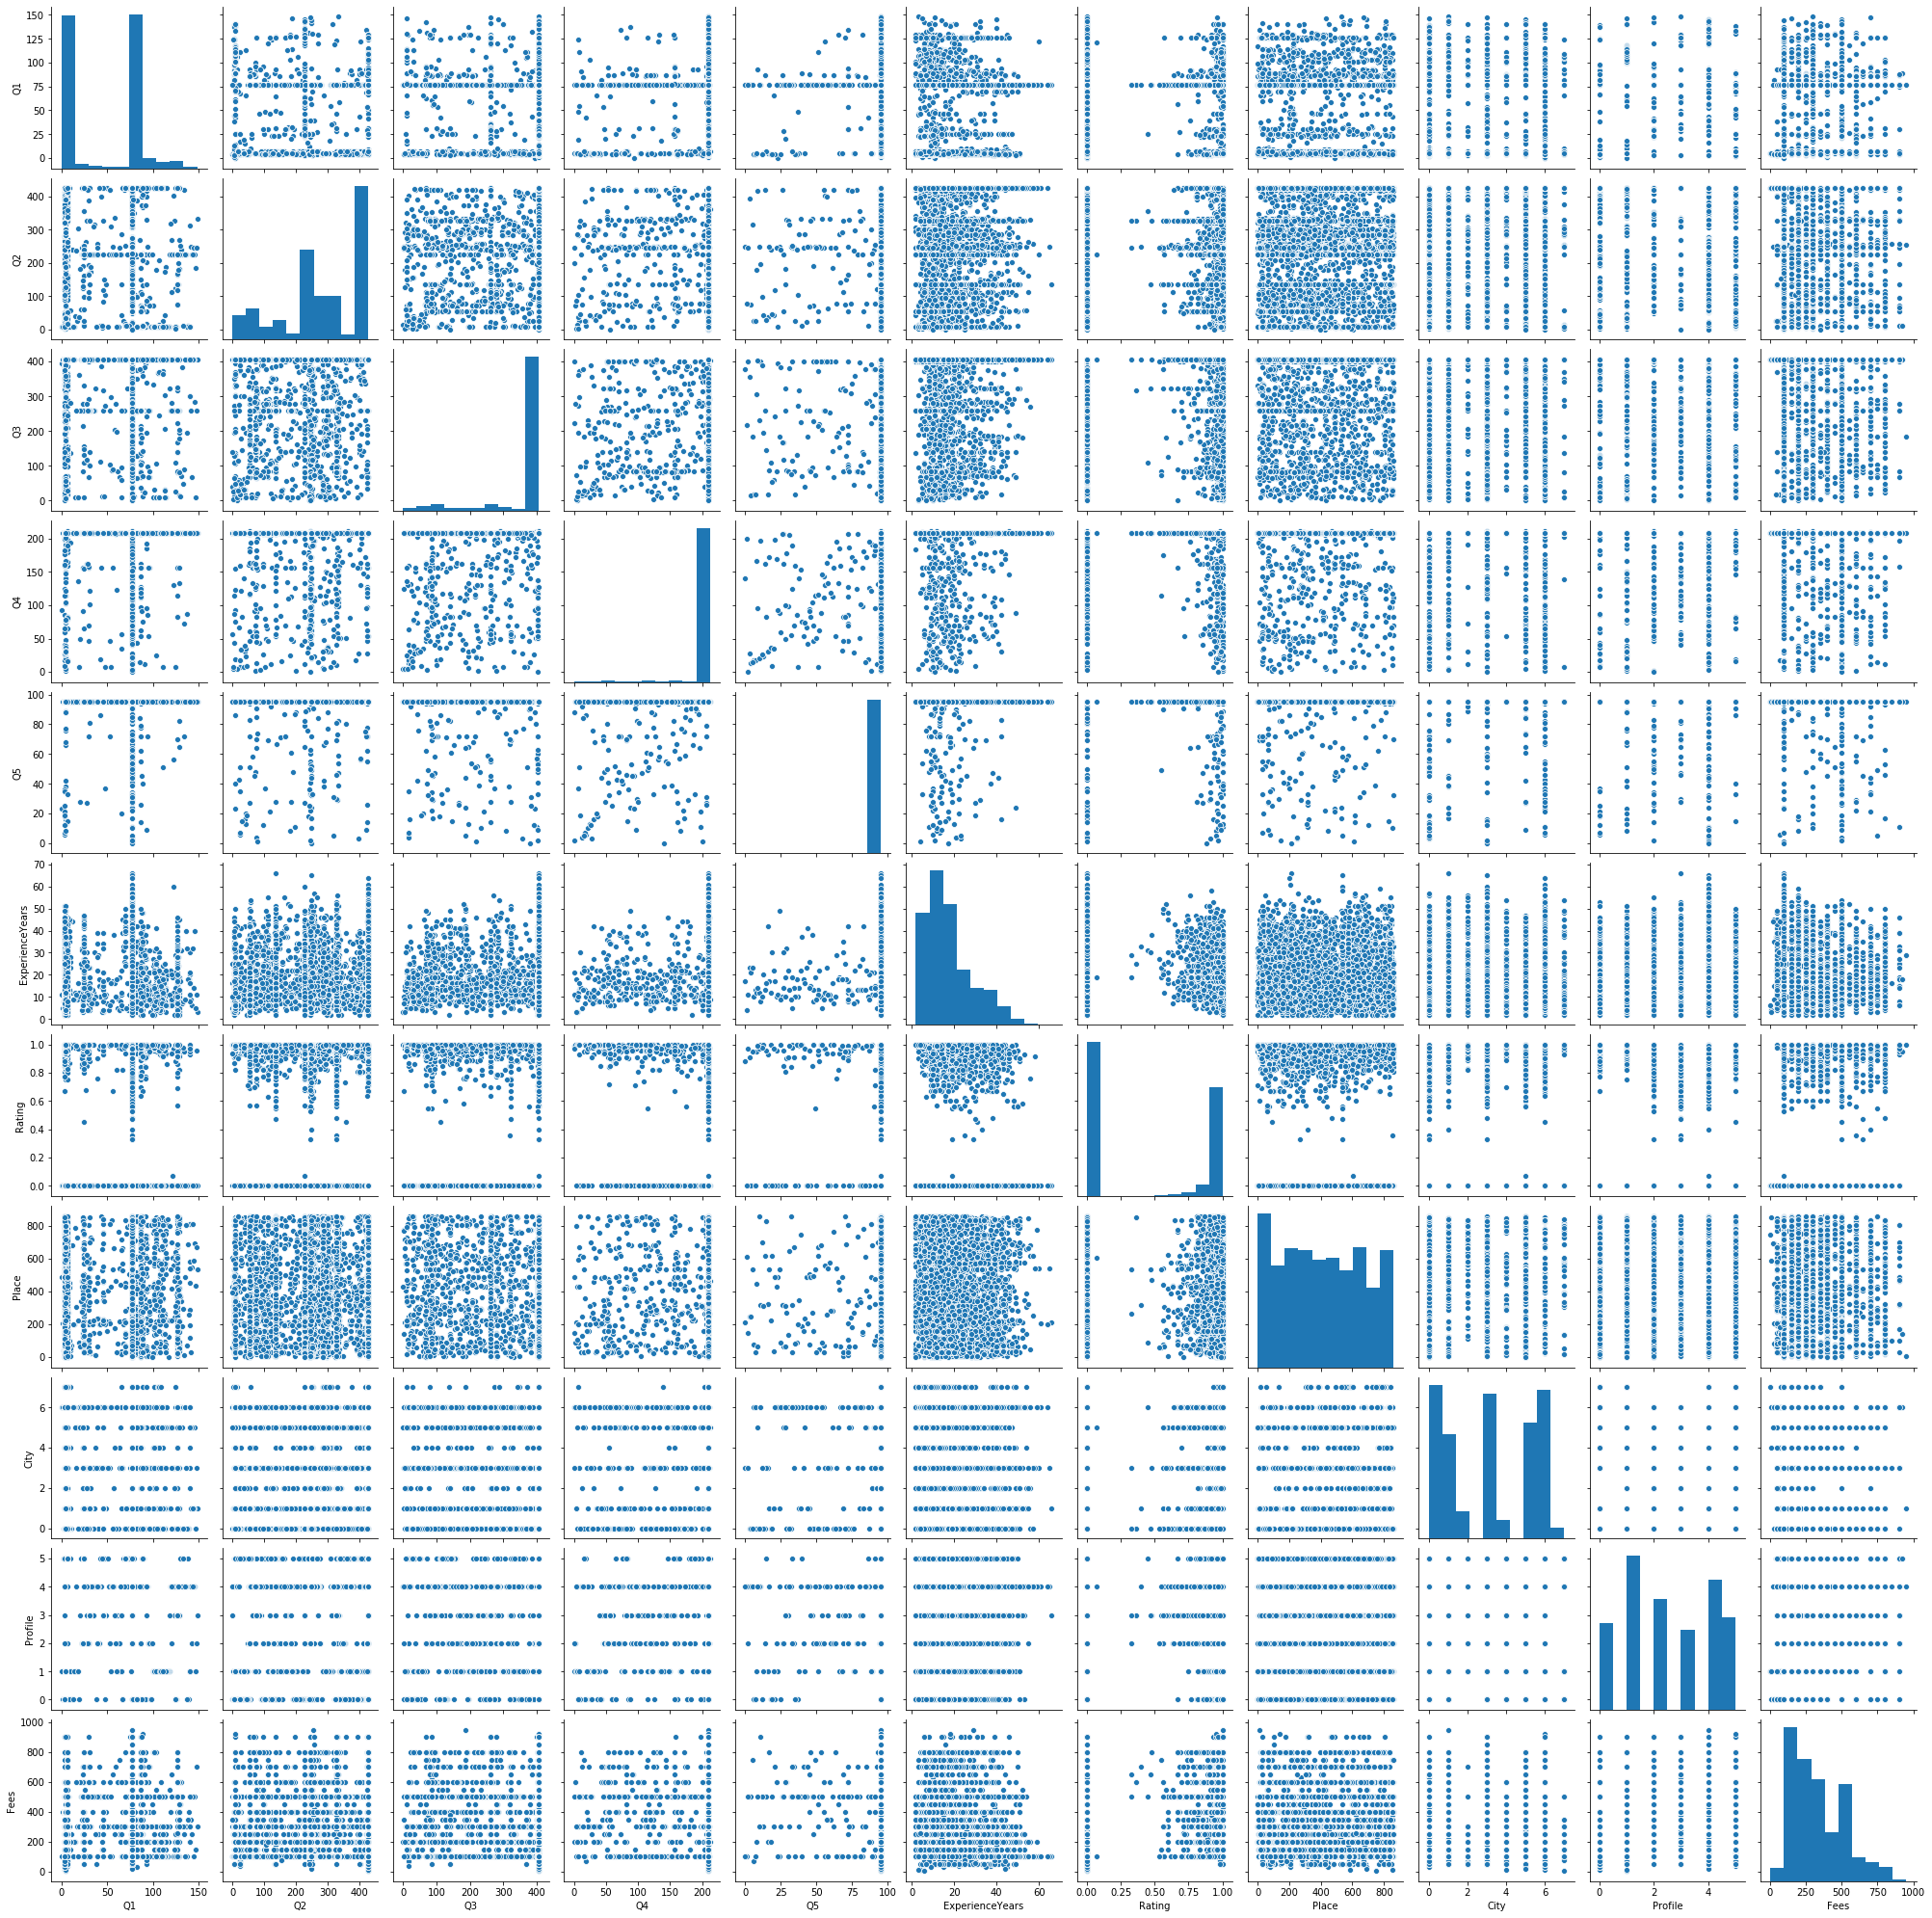

In [32]:
sns.pairplot(df)

In [33]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,ExperienceYears,Rating,Place,City,Profile,Fees
Q1,1.000000,-0.420875,-0.179239,-0.075305,-0.036221,0.208796,-0.007403,0.003920,-0.027491,0.310872,0.235197
Q2,-0.420875,1.000000,0.234980,0.122729,0.072290,-0.028776,-0.157741,0.013287,0.028174,0.000369,-0.169905
Q3,-0.179239,0.234980,1.000000,0.348742,0.180244,-0.025550,-0.129067,0.005299,0.019061,-0.037655,-0.117217
Q4,-0.075305,0.122729,0.348742,1.000000,0.446801,0.011077,-0.105920,0.048083,-0.018777,0.007561,-0.079933
Q5,-0.036221,0.072290,0.180244,0.446801,1.000000,0.006871,-0.058812,0.029446,0.002186,-0.003515,-0.071879
ExperienceYears,0.208796,-0.028776,-0.025550,0.011077,0.006871,1.000000,-0.053808,0.011608,0.032319,0.205986,-0.011335
Rating,-0.007403,-0.157741,-0.129067,-0.105920,-0.058812,-0.053808,1.000000,-0.039831,-0.096016,-0.128216,0.148263
Place,0.003920,0.013287,0.005299,0.048083,0.029446,0.011608,-0.039831,1.000000,-0.091040,0.017511,-0.055166
City,-0.027491,0.028174,0.019061,-0.018777,0.002186,0.032319,-0.096016,-0.091040,1.000000,-0.012255,-0.025876
Profile,0.310872,0.000369,-0.037655,0.007561,-0.003515,0.205986,-0.128216,0.017511,-0.012255,1.000000,0.145381


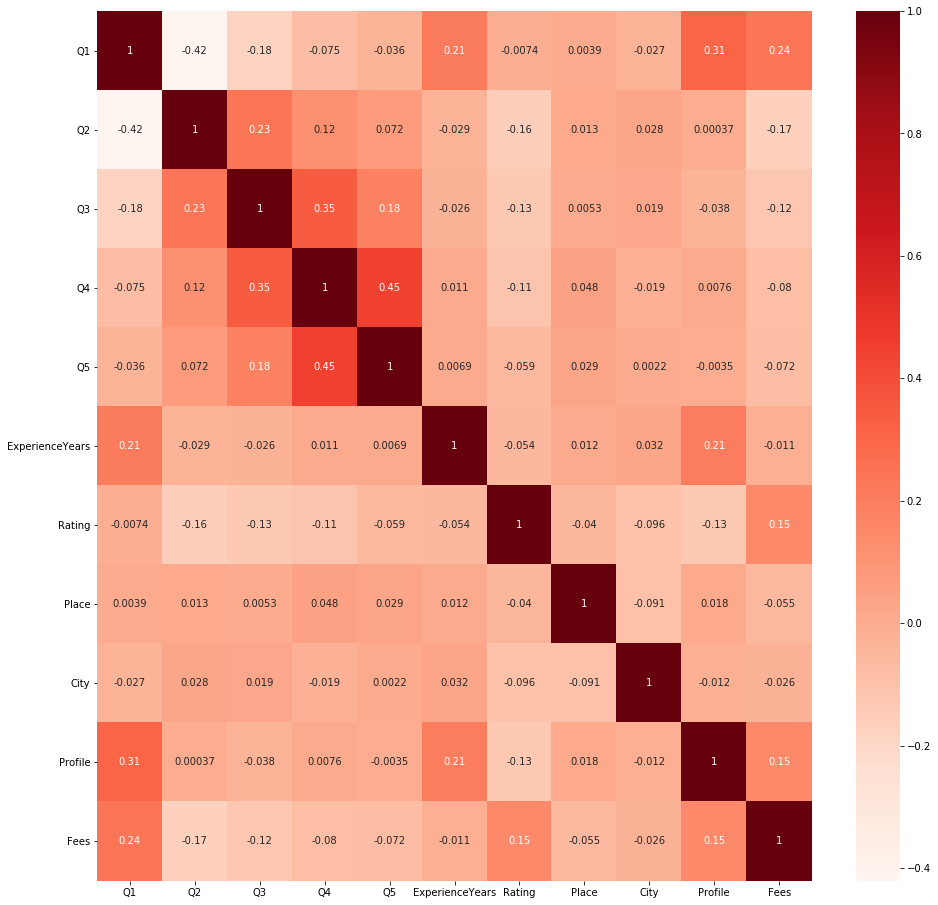

In [34]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr() ,  cmap = "Reds" , annot = True)

 Observations:
    1. Fees is positively correlated to Rating and Profile
    2. Fees is negatively correlated to Qualification , Experience years and City

In [157]:
# Dropping Columns

df = df.drop(["Q3" , "Q4" , "Q5" , "ExperienceYears"] , axis = 1)
test = test.drop(["Q3" , "Q4" , "Q5" , "ExperienceYears"] , axis = 1)


# Scaling Data

In [158]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df2 = sc.fit_transform(df)
df2 = pd.DataFrame(df2,columns = df.columns)



test2 = sc.fit_transform(test)
test2 = pd.DataFrame(test2,columns = test.columns)
test2 ,df2

(            Q1        Q2    Rating     Place      City   Profile
 0     0.762368  1.120779 -0.913983 -0.845023  1.309068  0.894378
 1     0.762368 -1.027452 -0.913983  1.668303  0.868280  0.290302
 2     0.762368 -1.695500  0.564998 -0.445439 -0.894871 -0.313774
 3    -1.098985 -0.005732  1.198847 -0.335409 -1.335659 -0.917849
 4    -1.098985 -0.018831  0.987564  1.523526 -0.894871 -0.917849
 ...        ...       ...       ...       ...       ...       ...
 1951 -1.140348 -0.935760 -0.913983 -1.331474 -1.335659 -1.521925
 1952  0.927822  1.094581 -0.913983 -1.111413 -0.894871 -0.313774
 1953  0.762368 -0.058128 -0.913983  0.776478 -0.894871  0.894378
 1954 -1.098985  1.120779  1.156591 -1.516788 -1.335659 -0.917849
 1955  0.762368 -0.320108 -0.913983  0.602746 -0.894871 -0.313774
 
 [1956 rows x 6 columns],
             Q1        Q2    Rating     Place      City   Profile      Fees
 0    -1.011660 -0.260308  1.209555 -0.448895  0.410607  1.539952 -1.098094
 1    -1.088708 -0.343950  1

# Finding Outliers

In [159]:
df = df2

collist = df.columns.values

ncol = 10
nrows = 14

collist

array(['Q1', 'Q2', 'Rating', 'Place', 'City', 'Profile', 'Fees'],
      dtype=object)

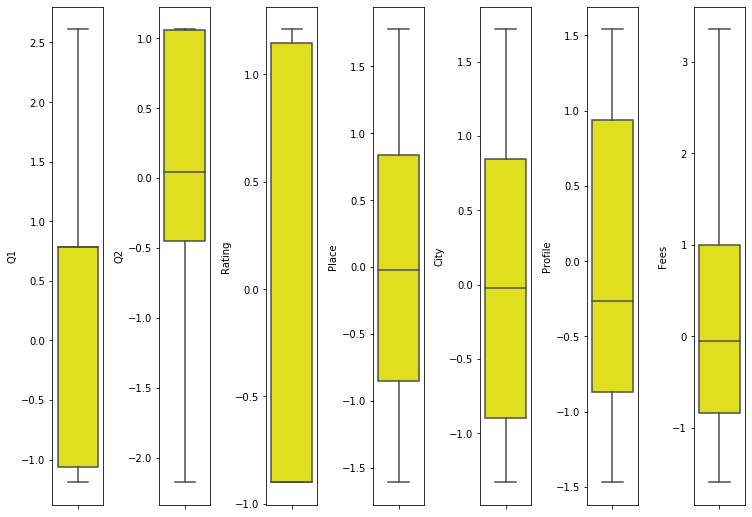

In [160]:
plt.figure(figsize = (1.5*ncol,10*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]] , color = 'yellow' , orient = 'v')
    plt.tight_layout()

In [161]:
test = test2

collist = test.columns.values

ncol = 10
nrows = 14

collist

array(['Q1', 'Q2', 'Rating', 'Place', 'City', 'Profile'], dtype=object)

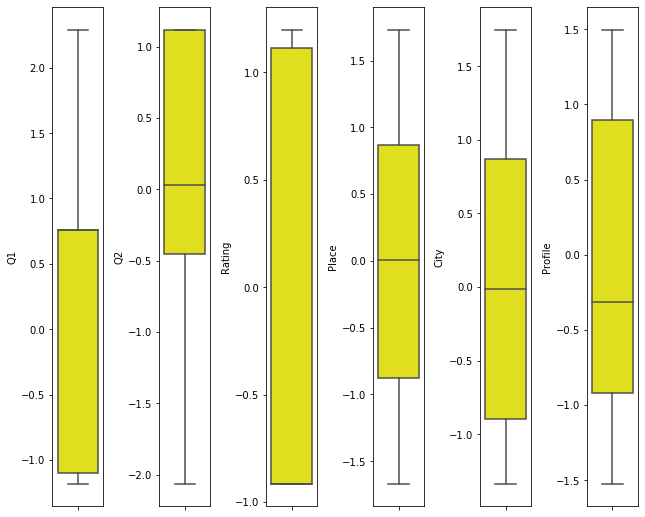

In [162]:
plt.figure(figsize = (1.5*ncol,10*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(test[collist[i]] , color = 'yellow' , orient = 'v')
    plt.tight_layout()

Outliers are present in years

In [163]:
# Removing outliers using Zscore

from scipy.stats import zscore


z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

df_new

,Q1,Q2,Rating,Place,City,Profile,Fees
0,-1.011660,-0.260308,1.209555,-0.448895,0.410607,1.539952,-1.098094
1,-1.088708,-0.343950,1.167354,1.740057,-1.331209,-1.471124,0.211574
2,0.786120,0.363199,-0.900478,0.161334,-1.331209,0.335521,-0.050359
3,-0.908930,-2.123228,-0.900478,-1.342586,-1.331209,-1.471124,-0.312293
4,-1.088708,1.055141,1.209555,-0.295353,-0.895755,-1.471124,-0.312293
...,...,...,...,...,...,...,...
5866,0.786120,0.317577,1.167354,-1.334712,-1.331209,0.335521,-0.050359
5867,0.786120,1.055141,-0.900478,0.484165,-0.895755,0.937737,-1.098094
5868,0.786120,1.055141,1.146254,-0.763852,-0.024847,0.937737,1.521243
5869,0.786120,-0.283120,0.998551,1.681003,1.281515,0.937737,-1.098094


In [164]:
# 20 rows approx removed to remove outliers

df.shape , df_new.shape

((5871, 7), (5851, 7))

In [165]:
# Removing outliers using Zscore in test data

z = np.abs(zscore(test))
test_new = test[(z<3).all(axis = 1)]

test_new

,Q1,Q2,Rating,Place,City,Profile
0,0.762368,1.120779,-0.913983,-0.845023,1.309068,0.894378
1,0.762368,-1.027452,-0.913983,1.668303,0.868280,0.290302
2,0.762368,-1.695500,0.564998,-0.445439,-0.894871,-0.313774
3,-1.098985,-0.005732,1.198847,-0.335409,-1.335659,-0.917849
4,-1.098985,-0.018831,0.987564,1.523526,-0.894871,-0.917849
...,...,...,...,...,...,...
1951,-1.140348,-0.935760,-0.913983,-1.331474,-1.335659,-1.521925
1952,0.927822,1.094581,-0.913983,-1.111413,-0.894871,-0.313774
1953,0.762368,-0.058128,-0.913983,0.776478,-0.894871,0.894378
1954,-1.098985,1.120779,1.156591,-1.516788,-1.335659,-0.917849


In [166]:
# 0 rows approx removed to remove outliers

test.shape , test_new.shape

((1956, 6), (1956, 6))

# Splitting in to Attributes and Target variables

In [167]:
x = df_new.drop(["Fees"] , axis = 1)

x

,Q1,Q2,Rating,Place,City,Profile
0,-1.011660,-0.260308,1.209555,-0.448895,0.410607,1.539952
1,-1.088708,-0.343950,1.167354,1.740057,-1.331209,-1.471124
2,0.786120,0.363199,-0.900478,0.161334,-1.331209,0.335521
3,-0.908930,-2.123228,-0.900478,-1.342586,-1.331209,-1.471124
4,-1.088708,1.055141,1.209555,-0.295353,-0.895755,-1.471124
...,...,...,...,...,...,...
5866,0.786120,0.317577,1.167354,-1.334712,-1.331209,0.335521
5867,0.786120,1.055141,-0.900478,0.484165,-0.895755,0.937737
5868,0.786120,1.055141,1.146254,-0.763852,-0.024847,0.937737
5869,0.786120,-0.283120,0.998551,1.681003,1.281515,0.937737


In [168]:
y = df_new["Fees"]

y

0      -1.098094
1       0.211574
2      -0.050359
3      -0.312293
4      -0.312293
          ...   
5866   -0.050359
5867   -1.098094
5868    1.521243
5869   -1.098094
5870   -0.574227
Name: Fees, Length: 5851, dtype: float64

In [169]:
y = y.values.reshape(-1,1)

y.shape , x.shape

((5851, 1), (5851, 6))

# Data Analysis - Linear Regression Model

In [170]:
from sklearn.model_selection import train_test_split, cross_val_score

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [172]:
lreg = LinearRegression()
knr = KNeighborsRegressor()
ls = Lasso()
en = ElasticNet()
dtr = DecisionTreeRegressor()

In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 32 , test_size = 0.20)

x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((4680, 6), (1171, 6), (4680, 1), (1171, 1))

In [53]:
#Best parameter for Linear Regression

parameters = { 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs = GridSearchCV(lreg , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [54]:
#Best parameter for KNearestNeighbors

parameters = { 'n_neighbors' : (1,10)}
gs = GridSearchCV(knr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 10}

In [55]:
#Best parameter for Decision Tree

parameters = { "criterion": ["mse", "mae"] }
gs = GridSearchCV(dtr , parameters )
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'mse'}

In [56]:
lreg = LinearRegression(copy_X = 'True' , fit_intercept = 'Flase' , normalize = 'True')
knr = KNeighborsRegressor(n_neighbors= 10)
dtr = DecisionTreeRegressor(criterion = 'mse')
svr = SVR()

In [174]:
lreg.fit(x_train,y_train)
pred=lreg.predict(x_test)
r2s = r2_score(y_test,pred)

print(r2s)

0.10409253705515409


In [88]:
# Best Parameter for Random Forest

rf = RandomForestRegressor()
parameters = {  "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(rf , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 1000}

In [89]:
# Best Parameter for Gradient Boosting

gbr = GradientBoostingRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [90]:
gbr = GradientBoostingRegressor(learning_rate = 0.01 ,n_estimators = 1000 )
rf = RandomForestRegressor(n_estimators = 1000)

In [137]:
models = []
models.append(('KNeighborsRegressor' , knr))
models.append(('LinearRegression' , lreg))
models.append(('Lasso' , ls))
models.append(('ElasticNet' , en))
models.append(('GradientBooster' , gbr))
models.append(('RandomForestRegressor' , rf))
models.append(('SVR' , svr))


models

[('KNeighborsRegressor',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform')),
 ('LinearRegression',
  LinearRegression(copy_X='True', fit_intercept='Flase', n_jobs=None,
                   normalize='True')),
 ('Lasso',
  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False)),
 ('ElasticNet',
  ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, normalize=False, positive=False, precompute=False,
             random_state=None, selection='cyclic', tol=0.0001, warm_start=False)),
 ('GradientBooster',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.01, loss='ls', max_depth=3,
 

In [175]:
Model = []
r2score = []
cv = []
rmse = []

for name,model in models:
    print("***************************" , name , "***************************\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    r2s = r2_score(y_test,pred)
    print("r2 score :" , r2s)
    r2score.append(r2s*100)
    print("\n")
    sc = cross_val_score(model , x, y , cv = 10 , scoring = 'r2')
    print("Cross_Val_score : " , sc)
    cv.append(sc*100)
    print("\n")
    rme = np.sqrt(mean_squared_error(y_test,pred))
    print("RMSE : " , rme)
    rmse.append(rme)
    print("\n\n")
    

*************************** KNeighborsRegressor ***************************

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


r2 score : 0.14301265891945392


Cross_Val_score :  [0.0508392  0.15052748 0.10521928 0.06880326 0.09218033 0.12161494
 0.1624723  0.07150251 0.0873196  0.08902487]


RMSE :  0.9260714457671798



*************************** LinearRegression ***************************

LinearRegression(copy_X='True', fit_intercept='Flase', n_jobs=None,
                 normalize='True')


r2 score : 0.10409253705515409


Cross_Val_score :  [0.08075909 0.11093313 0.09790761 0.0869151  0.09337823 0.06368819
 0.09474775 0.08082322 0.0988651  0.09937926]


RMSE :  0.9468667522088592



*************************** Lasso ***************************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=Fal

In [176]:
result = pd.DataFrame({'Model' : Model , 'R2Score' : r2score , "RMSE" : rmse , "Cross_Val_Score" :cv})

result

,Model,R2Score,RMSE,Cross_Val_Score
0,KNeighborsRegressor,14.301266,0.926071,"[5.083920001617326, 15.052748265438565, 10.521..."
1,LinearRegression,10.409254,0.946867,"[8.075909158838158, 11.09331301777381, 9.79076..."
2,Lasso,-0.078159,1.000753,"[-0.1624580680991139, -0.03209662277476877, -0..."
3,ElasticNet,-0.078159,1.000753,"[-0.1624580680991139, -0.03209662277476877, -0..."
4,GradientBooster,22.872211,0.878542,"[17.656740825384887, 20.20664687437572, 23.507..."
5,RandomForestRegressor,17.929877,0.906254,"[5.200607542152458, 13.41151312143365, 11.6436..."
6,SVR,10.945195,0.944030,"[11.394855076017773, 12.306664138278956, 8.716..."


In [178]:
# Best Model we consider is Gradient Booster as it has highest R2Score

max_r2 = 0

for rs in range(30,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = rs , test_size = 0.20)
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    r2s = r2_score(y_test,pred)
    if r2s > max_r2:
        max_r2 = r2s
        final_rm = rs
        print("Max R2 Score : " , max_r2 , "Max Random State" , final_rm)


Max R2 Score :  0.21083606899752672 Max Random State 30
Max R2 Score :  0.22249891163894842 Max Random State 31
Max R2 Score :  0.22869163423111416 Max Random State 32
Max R2 Score :  0.23273233914822522 Max Random State 60
Max R2 Score :  0.24257806835505225 Max Random State 65
Max R2 Score :  0.24427353074870783 Max Random State 97


In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 97 , test_size = 0.20)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
R2Score= r2_score(y_test,pred)

print("R2Score : " , R2Score)


R2Score :  0.24438382879317955


# Predicting the values

In [180]:
# Random Forestmodel as it has comapratively better r2score

df_pred = gbr.predict(x_test)

df_predict = pd.DataFrame(df_pred)

df_predict

,0
0,0.612995
1,0.223614
2,0.080168
3,-0.259748
4,-0.601780
...,...
1166,0.730358
1167,0.510555
1168,-0.978192
1169,-0.424381


# Saving the model

In [181]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(gbr , 'p13_doctors.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('p13_doctors.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([ 0.61299489,  0.22361417,  0.08016828, ..., -0.97819205,
       -0.42438057, -0.24904592])

In [182]:
# Saving Predict to csv

df_predict.to_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/doctors_predict.csv")